### Proyecto: Análisis de emociones<br>
Comisión 61790

##### ![1) Definición del objetivo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Definici%C3%B3n%20del%20objetivo.jpg?raw=true)

El objetivo de este proyecto es clasificar automáticamente la polaridad del sentimiento (positivo, negativo o neutro) de tweets relacionados con el ámbito político. Esto se logrará mediante la aplicación de un léxico de palabras predefinidas (positivas y negativas) para cada tweet.

##### ![2) Contexto comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Contexto%20comercial.jpg?raw=true)

En el ámbito político y social actual, la opinión pública expresada en redes sociales como Twitter (ahora X) juega un papel crucial. Los tweets representan un vasto repositorio de datos que, si se analizan correctamente, pueden ofrecer insights valiosos sobre la percepción ciudadana, la reacción a políticas o figuras públicas, y la identificación de tendencias emocionales emergentes. Para partidos políticos, analistas de medios, periodistas o investigadores sociales, comprender el sentimiento detrás de estas interacciones digitales es esencial para:

1. Monitorear la reputación: Evaluar cómo son percibidas ciertas figuras, partidos o iniciativas.
2. Identificar temas clave: Descubrir qué aspectos generan las reacciones más polarizadas.
3. Predecir tendencias: Anticipar posibles cambios en el apoyo o la oposición a determinadas ideas.
4. Evaluar el impacto de campañas: Medir la respuesta emocional a comunicaciones o eventos.

Sin un enfoque sistemático, esta información permanece oculta o es difícil de cuantificar, limitando la capacidad de tomar decisiones informadas.

##### ![3) Problema comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Problema%20comercial.jpg?raw=true)

Actualmente no existe un método eficiente y escalable para analizar y cuantificar la polaridad de los miles de tweets políticos generados diariamente en español. El análisis manual es inviable debido al volumen de datos, y las herramientas genéricas de análisis de sentimiento a menudo carecen de la especificidad o la precisión necesaria para capturar los matices del discurso político en español, especialmente en un contexto tan dinámico y cargado emocionalmente.<br>

Esto lleva a los siguientes desafíos:
- Falta de conocimiento estratégico: Las organizaciones no pueden comprender rápidamente el pulso emocional de la ciudadanía frente a eventos políticos clave.
- Ineficiencia operativa: Se pierden horas de trabajo en intentos manuales de clasificar datos, o se recurre a análisis superficiales.
- Oportunidades perdidas: No se identifican tendencias emergentes o cambios bruscos en el sentimiento que podrían informar decisiones estratégicas.

Este proyecto busca resolver estos problemas proporcionando una solución automatizada y cuantificable para el análisis de sentimiento, permitiendo una comprensión más profunda y rápida del panorama emocional político.<br>

##### ![Librerías utilizadas:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Librerias%20utilizadas.jpg?raw=true)

🗒️ A continuación se detallan las librerías utilizadas en esta primera parte del proyecto.

In [1]:
import pandas as pd
import numpy as np

# Importamos el módulo re de Python el cual nos permite utilizar expresiones regulares.
import re

# Importamos la librería nltk, una de las bibliotecas más comunes y robustas en Python
# utilizadas para la eliminación de stopwords
import nltk
from nltk.corpus import stopwords # Importamos las stopwords

# Librerías de Lematización
import spacy # Importamos spaCy

# Utilizamos la librería TfidfVectorizer para la vectorización del corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


##### ![4) Data Acquisition:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Acquisition.jpg?raw=true)

Este dataset fue construido mediante un proceso de web scraping de perfiles de Twitter (ahora X) de diversos dirigentes políticos en Argentina, abarcando el período desde noviembre de 2024 hasta junio de 2025.<br>
<br>
Para el presente análisis nos hemos focalizado exclusivamente en los tweets publicados por el presidente Javier Milei.<br>

In [2]:
# Origen de los datos
url_dataset="https://raw.githubusercontent.com/chetincho/Analisis_de_Sentimientos/refs/heads/main/dataset/dataset.txt"

# Carga del dataframe
df = pd.read_csv(url_dataset, sep='|')

# Seteamos el índice del dataframe para que comience en 1
df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

# Seteamos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

##### ![5) Exploratory Data Analysis (EDA):](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Exploratory%20Data%20Analysis.jpg?raw=true)

🗒️ ¿Cuál es la cantidad de filas y columnas que componen el dataframe?

In [3]:
filas, columnas = df.shape
print(f"✅ Total de Filas = {filas}")
print(f"✅ Total de Columnas = {columnas}")

✅ Total de Filas = 3316
✅ Total de Columnas = 19


🗒️ ¿Cuáles son las columnas o atributos que lo componen?

In [4]:
# Utilizo el método .tolist() para convertir las columnas en una lista
print(f"El dataframe está compuesto por las siguientes columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(f"📁 {columna}")

El dataframe está compuesto por las siguientes columnas:
📁 Usuario X
📁 ID
📁 Text
📁 Language
📁 Type
📁 Author Name
📁 Author Username
📁 View Count
📁 Bookmark Count
📁 Favorite Count
📁 Retweet Count
📁 Reply Count
📁 Quote Count
📁 Created At
📁 Source
📁 Hashtags
📁 URLs
📁 Media Type
📁 Media URLs


🗒️ ¿Hay valores nulos?

In [5]:
print(f"ℹ️ Total de valores nulos detectados: {sum(df.isnull().sum())} valores")

ℹ️ Total de valores nulos detectados: 9753 valores


🗒️ ¿Cuáles son los atributos que contienen valores nulos?, ¿alguno de dichos atributos son críticos para el análisis?

In [6]:
print("ℹ️ Valores nulos por columna:")
print(df.isnull().sum())

ℹ️ Valores nulos por columna:
Usuario X             0
ID                    0
Text                  0
Language              0
Type                  0
Author Name           0
Author Username       0
View Count            0
Bookmark Count        0
Favorite Count        0
Retweet Count         0
Reply Count           0
Quote Count           0
Created At            0
Source                0
Hashtags           3103
URLs               2774
Media Type         1938
Media URLs         1938
dtype: int64


👍 No se detectan atributos claves para el análisis que contengan valores nulos

🗒️ ¿Cuáles son los tipos de dato de cada columna?

In [7]:
print(f"Tipo de Dato por Columna:")
for columna, tipo in df.dtypes.items():
    print(f"🔍 {columna}: {tipo}")

Tipo de Dato por Columna:
🔍 Usuario X: object
🔍 ID: int64
🔍 Text: object
🔍 Language: object
🔍 Type: object
🔍 Author Name: object
🔍 Author Username: object
🔍 View Count: int64
🔍 Bookmark Count: int64
🔍 Favorite Count: int64
🔍 Retweet Count: int64
🔍 Reply Count: int64
🔍 Quote Count: int64
🔍 Created At: object
🔍 Source: object
🔍 Hashtags: object
🔍 URLs: object
🔍 Media Type: object
🔍 Media URLs: object


⚠️ Se observa que el atributo `Created At` fue almacenado en el dataframe como de tipo `object` cuando en realidad debe ser de tipo `datetime`. Se procede con la corrección de tipo.

In [8]:
# Realizamos la corrección del tipo de dato para la columna “Created At”
df['Created At'] = pd.to_datetime(df['Created At'])

# Verificamos el nuevo tipo de dato para la columna “Created At”
print(f"🔍 El nuevo tipo de dato es: {df['Created At'].dtype}")

🔍 El nuevo tipo de dato es: datetime64[ns]


In [9]:
print(f"🔍 Resumen de los tipos de datos que componen el dataframe:")
resumen_tipos_datos = df.dtypes.value_counts()
print(resumen_tipos_datos)

🔍 Resumen de los tipos de datos que componen el dataframe:
object            11
int64              7
datetime64[ns]     1
Name: count, dtype: int64


🗒️ Veamos una pequeña muestra del dataframe, exploramos las primeras y últimas filas.

In [10]:
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df.head(10)

🗂️ PRIMEROS 10 REGISTROS


,Usuario X,ID,Text,Language,Type,Author Name,Author Username,View Count,Bookmark Count,Favorite Count,Retweet Count,Reply Count,Quote Count,Created At,Source,Hashtags,URLs,Media Type,Media URLs
1,JMilei,1888684208325075281,VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO,es,Tweet,Javier Milei,JMilei,47514,2,623,94,189,3,2025-02-09 17:19:39,Twitter for Android,NaN,https://www.instagram.com/reel/DF3X1fDJBBZ/?ig...,NaN,NaN
2,JMilei,1888636220445511716,TREMENDA MASTERCLAS del PROFE @jlespert al bru...,es,Tweet,Javier Milei,JMilei,1648346,297,17418,2500,1278,193,2025-02-09 14:08:58,Twitter for Android,NaN,NaN,NaN,NaN
3,JMilei,1888632601813885362,Creí que a mis 63 años ya lo había visto todo ...,es,Quoted,José Luis Espert,jlespert,1217423,451,13667,2269,847,137,2025-02-09 13:54:36,Twitter Web App,NaN,NaN,NaN,NaN
4,JMilei,1888440655422136478,NO APTO PARA SOCIALISTAS,es,Tweet,Javier Milei,JMilei,632983,1291,18885,4333,1142,139,2025-02-09 01:11:52,Twitter for Android,NaN,NaN,NaN,NaN
5,JMilei,1888340973530554371,¿Por qué el libertarismo no tiene nada que ver...,es,Quoted,Fundación Faro Argentina,fundfaro,951653,1568,8537,3154,383,233,2025-02-08 18:35:46,Twitter Web App,NaN,NaN,video,https://video.twimg.com/amplify_video/18883361...
6,JMilei,1888428020718862373,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,406762,167,13241,1835,535,50,2025-02-09 00:21:40,Twitter for Android,NaN,NaN,NaN,NaN
7,JMilei,1888412358025838681,"ELON: I'M A BIG FAN OF MILEI ""He's doing fanta...",en,Quoted,Mario Nawfal,MarioNawfal,987028,188,4671,765,152,63,2025-02-08 23:19:25,Twitter Web App,NaN,NaN,video,https://video.twimg.com/ext_tw_video/188841227...
8,JMilei,1888389829567598645,VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU,es,Tweet,Javier Milei,JMilei,38314,2,499,70,82,6,2025-02-08 21:49:54,Twitter for Android,NaN,https://www.instagram.com/p/DF1SDIaJdsl/?igsh=...,NaN,NaN
9,JMilei,1888329760608002243,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,223230,24,6192,661,435,43,2025-02-08 17:51:13,Twitter for Android,NaN,NaN,NaN,NaN
10,JMilei,1888320882088518008,Essential for general prosperity,ca,Quoted,Elon Musk,elonmusk,15328834,1640,99078,11470,2045,285,2025-02-08 17:15:56,Twitter for iPhone,NaN,NaN,NaN,NaN


In [11]:
print("🗂️ ÚLTIMOS 10 REGISTROS")
print("========================")
df.tail(10)

🗂️ ÚLTIMOS 10 REGISTROS


,Usuario X,ID,Text,Language,Type,Author Name,Author Username,View Count,Bookmark Count,Favorite Count,Retweet Count,Reply Count,Quote Count,Created At,Source,Hashtags,URLs,Media Type,Media URLs
3307,JMilei,1941571022471430363,FENÓMENO MUNDIAL https://t.co/cc5SJcEndu,es,Retweet,Ave Miller,gorrasdeljavo,39217,53,202,6,1356,16,2025-07-05 15:52:59,TweetDeck Web App,NaN,NaN,photo,https://pbs.twimg.com/media/GvHYgKgWsAAeeuC.jpg
3308,JMilei,1941533892848283918,Javier Milei dará un discurso en la inauguraci...,es,Retweet,Marina,Marinabiagettii,47770,46,44,3,278,0,2025-07-05 13:25:26,Twitter for Android,NaN,NaN,photo,https://pbs.twimg.com/media/GvG2yUcXUAAkusP.jpg
3309,JMilei,1941568307213255061,AURA https://t.co/coWTQo2nwc,eu,Retweet,SheIby,TommyShelby_30,27647,17,112,4,903,7,2025-07-05 15:42:11,Twitter for iPhone,NaN,NaN,photo,https://pbs.twimg.com/media/GvHWFTkXsAAqjNl.jpg
3310,JMilei,1941555643237994589,El Presidente Javier Milei junto al Primer Min...,es,Retweet,Oficina del Presidente,OPRArgentina,196324,101,429,17,3485,30,2025-07-05 14:51:52,Twitter for Android,NaN,NaN,photo,https://pbs.twimg.com/media/GvHKkRJXsAA3MCG.jpg
3311,JMilei,1941558663933722848,"FOTAAAAZAAAAA!!! 🇮🇳🇦🇷 ""Coincidimos en que el c...",es,Retweet,Marina,Marinabiagettii,34258,29,107,1,761,8,2025-07-05 15:03:52,Twitter for Android,NaN,NaN,photo,https://pbs.twimg.com/media/GvHNUJMWMAAFd85.jpg
3312,JMilei,1941520940799754296,🇦🇷🇮🇳 El presidente Javier Milei recibió en Ca...,es,Retweet,La Derecha Diario,laderechadiario,47473,62,181,23,1080,20,2025-07-05 12:33:58,Twitter for Android,NaN,NaN,video,https://video.twimg.com/amplify_video/19415001...
3313,JMilei,1941525477694505458,🇦🇷🤝🇮🇳Se viene tremendo acuerdo con la India! @...,es,Retweet,Agarra la Pala,agarra_pala,52514,88,203,10,1961,9,2025-07-05 12:52:00,Twitter Web App,NaN,NaN,photo,https://pbs.twimg.com/media/GvGuYQfW4AALF3s.jpg
3314,JMilei,1941332000205582752,JAVIER CUMPLE ✅️ 🇦🇷🔥 Qué lindo ver como se cum...,es,Retweet,Teresa Christina C.🦁💜🇦🇷,Tcristina77,28680,12,105,1,579,18,2025-07-05 00:03:11,Twitter for Android,NaN,NaN,video,https://video.twimg.com/ext_tw_video/194133197...
3315,JMilei,1941524058048430524,El abrazo de Javier Milei y el Primer Ministro...,es,Retweet,Marina,Marinabiagettii,28364,11,65,1,504,3,2025-07-05 12:46:21,Twitter for Android,NaN,NaN,photo,https://pbs.twimg.com/media/GvGt150XMAAfFws.jpg
3316,JMilei,1941555939162865911,"Y mientras tanto, en la mayoría de los medios ...",es,Retweet,𝙏𝙧𝙤𝙣𝙘𝙤,tronco,64183,111,339,3,2098,7,2025-07-05 14:53:02,Twitter for iPhone,NaN,NaN,NaN,NaN


Selección de tweets:<br>
- Dirigentes seleccionados Author Username = JMilei <br>
- Type = Tweet <br>
- Fecha desde/hasta: completo <br>

In [12]:
condicion_username = df['Author Username'] == 'JMilei'
condicion_type = df['Type'] == 'Tweet'

# Creo un nuevo dataframe con la data filtrada
df_sentimientos = df[condicion_username & condicion_type].copy()

🗒️ Dimensionalidad del dataframe que será sujeto al análisis de sentimientos

In [13]:
filas, columnas = df_sentimientos.shape
print(f"✅ Total de Filas = {filas}")
print(f"✅ Total de Columnas = {columnas}")

✅ Total de Filas = 1105
✅ Total de Columnas = 19


🗒️ Veamos una pequeña muestra del nuevo dataframe, exploramos las primeras filas.

In [14]:
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df_sentimientos.head(10)

🗂️ PRIMEROS 10 REGISTROS


,Usuario X,ID,Text,Language,Type,Author Name,Author Username,View Count,Bookmark Count,Favorite Count,Retweet Count,Reply Count,Quote Count,Created At,Source,Hashtags,URLs,Media Type,Media URLs
1,JMilei,1888684208325075281,VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO,es,Tweet,Javier Milei,JMilei,47514,2,623,94,189,3,2025-02-09 17:19:39,Twitter for Android,NaN,https://www.instagram.com/reel/DF3X1fDJBBZ/?ig...,NaN,NaN
2,JMilei,1888636220445511716,TREMENDA MASTERCLAS del PROFE @jlespert al bru...,es,Tweet,Javier Milei,JMilei,1648346,297,17418,2500,1278,193,2025-02-09 14:08:58,Twitter for Android,NaN,NaN,NaN,NaN
4,JMilei,1888440655422136478,NO APTO PARA SOCIALISTAS,es,Tweet,Javier Milei,JMilei,632983,1291,18885,4333,1142,139,2025-02-09 01:11:52,Twitter for Android,NaN,NaN,NaN,NaN
6,JMilei,1888428020718862373,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,406762,167,13241,1835,535,50,2025-02-09 00:21:40,Twitter for Android,NaN,NaN,NaN,NaN
8,JMilei,1888389829567598645,VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU,es,Tweet,Javier Milei,JMilei,38314,2,499,70,82,6,2025-02-08 21:49:54,Twitter for Android,NaN,https://www.instagram.com/p/DF1SDIaJdsl/?igsh=...,NaN,NaN
9,JMilei,1888329760608002243,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,223230,24,6192,661,435,43,2025-02-08 17:51:13,Twitter for Android,NaN,NaN,NaN,NaN
11,JMilei,1888298020938330160,Acá podemos observar cómo la basura de Brancat...,es,Tweet,Javier Milei,JMilei,4043267,2325,86470,13471,4399,721,2025-02-08 15:45:05,Twitter for Android,NaN,NaN,NaN,NaN
13,JMilei,1888287507558592575,BRILLANTE,es,Tweet,Javier Milei,JMilei,224010,27,5044,671,387,15,2025-02-08 15:03:19,Twitter for Android,NaN,NaN,NaN,NaN
15,JMilei,1887999293224542433,https://t.co/znZUzFRxn0,zxx,Tweet,Javier Milei,JMilei,89044,30,4832,754,497,47,2025-02-07 19:58:03,Twitter for Android,NaN,https://www.infobae.com/politica/2025/02/07/ja...,NaN,NaN
16,JMilei,1887948597679055312,AQUÍ MI OPINIÓN SOBRE EL TIPO DE CAMBIO Y LOS ...,es,Tweet,Javier Milei,JMilei,1785801,725,12808,2570,1184,252,2025-02-07 16:36:36,Twitter for Android,NaN,https://www.lanacion.com.ar/opinion/opinion-at...,NaN,NaN


##### ![6) Data Wrangling / Data Munging:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Wrangling%20Munging.jpg?raw=true)

A continuación vamos a proceder con los siguientes pasos claves para la preparación de los datos: <br>
<br>
`1. Limpieza del Texto:` Vamos a eliminar el posible ruido que contenga el atributo Text, campo que almacena el texto puro del tweet publicado por el referente político. En este caso la limpieza busca eliminar: enlaces, menciones, hashtags, caracteres especiales, emojis, etc.<br>
<br>
🗒️La limpieza del texto es crucial para que el modelo de análisis de sentimientos pueda realizar una correcta interpretación.

Tareas a ejecutar:
- Eliminar URLs
- Eliminar menciones (@usuario)
- Eliminar hashtags (#hashtag)
- Eliminar signos de puntuación y caracteres especiales
- Convertir el texto a minúsculas
- Eliminar stopwords (palabras comunes que no aportan significado, como "el", "la", "un", etc.)
- Lematización (reducir palabras a su raíz, por ejemplo, "corriendo" a "correr").

Tarea 1: Eliminar URL's<br>
Los tweets a menudo contienen enlaces a sitios web o imágenes los cuales no aportan valor al análisis de sentimiento y pueden incluso confundir el modelo.

In [15]:
def eliminar_urls(text):
    # Utilizamos expresiones regulares para encontrar URLs
    # Buscamos los siguientes patrones como http://, https://, www., o cualquier terminación de dominio (.com, .org, .net, etc.)
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.(com|org|net|gov|edu|info|io|co|ar|es)[/\w.-]*')
    return url_pattern.sub(r'', text)

# Aplicamos la función a la columna 'Text' y creamos una nueva columna llamada "Texto_Limpio"
df_sentimientos['Texto_Limpio'] = df_sentimientos['Text'].apply(eliminar_urls)

🗒️ Mostramos los primeros 20 registros para confirmar la correcta limpieza de los datos.

In [16]:
print(df_sentimientos[['Text', 'Texto_Limpio']].head(20))

                                                 Text  \
1     VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO   
2   TREMENDA MASTERCLAS del PROFE @jlespert al bru...   
4                            NO APTO PARA SOCIALISTAS   
6                                    FENÓMENO BARRIAL   
8     VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU   
9                                    FENÓMENO BARRIAL   
11  Acá podemos observar cómo la basura de Brancat...   
13                                          BRILLANTE   
15                            https://t.co/znZUzFRxn0   
16  AQUÍ MI OPINIÓN SOBRE EL TIPO DE CAMBIO Y LOS ...   
17    VIVA LA LIBERTAD CARAJO https://t.co/eIMvBa2nmc   
18  VIVA LA LIBERTAD CARAJO CC: @Nikgaturro https:...   
19  FENÓMENO BARRIAL Este comentario le caerá muy ...   
20  FENÓMENO BARRIAL VIVA LA LIBERTAD CARAJO https...   
21    VIVA LA LIBERTAD CARAJO https://t.co/RUXTtO7OZd   
22                                         IMPERDIBLE   
24    VIVA LA LIBERTAD CARAJO h

Tarea 2: Eliminar menciones<br>
Estas menciones son importantes para la interacción en la plataforma pero generalmente no contribuyen al sentimiento general del tweet y le aportan ruido al análisis.

In [17]:
def eliminar_menciones(text):
    # Utilizamos expresiones regulares para encontrar las menciones
    # En este caso la expresión regular comienza con '@' seguido de palabras o números
    menciones_pattern = re.compile(r'@\w+')
    return menciones_pattern.sub(r'', text)

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(eliminar_menciones)

🗒️ Mostramos los primeros 20 registros para confirmar la correcta limpieza de los datos.

In [18]:
print(df_sentimientos[['Text', 'Texto_Limpio']].head(20))

                                                 Text  \
1     VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO   
2   TREMENDA MASTERCLAS del PROFE @jlespert al bru...   
4                            NO APTO PARA SOCIALISTAS   
6                                    FENÓMENO BARRIAL   
8     VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU   
9                                    FENÓMENO BARRIAL   
11  Acá podemos observar cómo la basura de Brancat...   
13                                          BRILLANTE   
15                            https://t.co/znZUzFRxn0   
16  AQUÍ MI OPINIÓN SOBRE EL TIPO DE CAMBIO Y LOS ...   
17    VIVA LA LIBERTAD CARAJO https://t.co/eIMvBa2nmc   
18  VIVA LA LIBERTAD CARAJO CC: @Nikgaturro https:...   
19  FENÓMENO BARRIAL Este comentario le caerá muy ...   
20  FENÓMENO BARRIAL VIVA LA LIBERTAD CARAJO https...   
21    VIVA LA LIBERTAD CARAJO https://t.co/RUXTtO7OZd   
22                                         IMPERDIBLE   
24    VIVA LA LIBERTAD CARAJO h

Tarea 3: Eliminar hashtags<br>
Los hashtags son elementos estructurales de Twitter que suelen agrupar temas, pero su presencia en el texto puede no ser útil para un análisis de sentimiento.

In [19]:
def eliminar_hashtags(text):
    # Utilizamos expresiones regulares para encontrar los hashtags
    # En este caso la expresión regular comienza con '#' seguido de palabras o números
    hashtag_pattern = re.compile(r'#\w+')
    return hashtag_pattern.sub(r'', text)

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(eliminar_hashtags)

🗒️ Mostramos una selección de filas donde sabemos que hay un hashtag.

In [20]:
# Ajustamos el seteo de pandas para que se muestre el contenido de toda la fila y no lo trunque
pd.set_option('display.max_colwidth', None)

# Mostramos un extracto donde sabemos que hay un #
print(df_sentimientos[['Text', 'Texto_Limpio']].loc[610:650])

# Devolvemos este seteo a los valores por defecto.
pd.set_option('display.max_colwidth', 50)

                                                                                                                                                                                                                                                                                      Text  \
611                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
613                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
615                                                                                                                                           

Tarea 4: Eliminar signos de puntuación y caracteres especiales<br>
Al tratarse de un análisis de texto en español es crucial conservar las ñ y las tildes (á, é, í, ó, ú, ü) junto con el símbolo de exclamación (!)

In [21]:
def eliminar_caracteres_especiales(text):
    # 'a-zA-Z' cubre las letras básicas.
    # '0-9' cubre los números.
    # '\s' cubre los espacios en blanco.
    # '!' conserva el signo de exclamación.
    # 'ñÑáÁéÉíÍóÓúÚüÜ' cubren los caracteres específicos del español.
    texto_limpio = re.sub(r'[^a-zA-Z0-9\s!ñÑáÁéÉíÍóÓúÚüÜ]', '', text)
    return texto_limpio

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(eliminar_caracteres_especiales)

🗒️ Mostramos una selección de filas donde sabemos que hay caracteres especiales.

In [22]:
# Ajustamos el seteo de pandas para que se muestre el contenido de toda la fila y no lo trunque
pd.set_option('display.max_colwidth', None)

# mostramos un extracto donde sabemos que hay un #
print(df_sentimientos[['Text', 'Texto_Limpio']].loc[610:650])

# Devolvemos este seteo a los valores por defecto.
pd.set_option('display.max_colwidth', 50)

                                                                                                                                                                                                                                                                                      Text  \
611                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
613                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
615                                                                                                                                           

Paso 5: Convertir el texto a minúsculas<br>
Motivos por los cuales la conversión a minúsculas es fundamental en cualquier análisis de Procesamiento de Lenguaje Natural (PLN).<br>
<br>

- `Normalización:` Trata de igual manera palabras con diferente capitalización (ej. "Libertad", "libertad", "LIBERTAD"). Esto es esencial para que un modelo de análisis de sentimientos no las vea como entidades distintas.

- `Reducción del Vocabulario:` Disminuye el tamaño del vocabulario, lo que conlleva una mejora en el rendimiento y la eficiencia de los modelos. Por ejemplo, en lugar de tener "Libertad", "LIBERTAD" y "libertaD", solo tendremos "libertad".

- `Consistencia:` Asegura que las comparaciones y el conteo de palabras sean consistentes en todo el dataset.

In [23]:
def convertir_a_minusculas(text):
    return text.lower()

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(convertir_a_minusculas)

🗒️ Mostramos una selección de filas donde sabemos que hay mayúsculas.

In [24]:
# Ajustamos el seteo de pandas para que se muestre el contenido de toda la fila y no lo trunque
pd.set_option('display.max_colwidth', None)

# Mostramos un extracto
print(df_sentimientos[['Text', 'Texto_Limpio']].loc[610:650])

# Devolvemos este seteo a los valores por defecto.
pd.set_option('display.max_colwidth', 50)

                                                                                                                                                                                                                                                                                      Text  \
611                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
613                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
615                                                                                                                                           

Paso 6: Eliminar stopwords<br>
- Fundamentos:<br>
La eliminación de stopwords es un paso crítico en el preprocesamiento de texto referido a tareas de análisis de sentimientos. Las stopwords son palabras muy comunes en un idioma que, por lo general, no aportan un significado semántico relevante para el análisis. Entre las stopwords encontramos: `artículos` (el, la, un), `preposiciones` (de, en, para), `conjunciones` (y, o), `pronombres` (yo, tú), y `verbos auxiliares`, entre otras.<br>
<br>
- ¿Por qué es importante este paso?<br>
    1. `Reducción de Ruido:` Estas palabras aparecen con altísima frecuencia en casi cualquier texto, pero no suelen llevar la carga semántica principal del mensaje. Por ejemplo, en la frase "La película es muy buena para ver el sábado", las palabras clave que indican el sentimiento son `"muy"` y `"buena"`. "La", "es", "para", "ver", "el", "sábado" son stopwords o palabras de bajo valor que simplemente estructuran la oración. Eliminarlas reduce el "ruido" que podría distraer al modelo.<br>
    <br>
    2. `Optimización del Rendimiento:` Al remover las stopwords, se reduce significativamente el número total de palabras en tu conjunto de datos. Esto tiene dos beneficios directos:<br>
    <br>
        - `Menor dimensionalidad:` Cuando transformamos un texto en representaciones numéricas (como vectores de palabras), tener menos palabras únicas reduce la cantidad de dimensiones, lo que puede acelerar el entrenamiento de los modelos y hacerlos más eficientes computacionalmente.<br>
        - `Menor uso de memoria:` Un vocabulario más pequeño requiere menos memoria tanto en el almacenamiento como durante el procesamiento.<br>
    <br>
    3. `Mejora de la Precisión del Modelo:` Al centrar el análisis en las palabras que realmente transmiten significado, los modelos de análisis de sentimientos pueden identificar patrones más claros y relevantes. Si las stopwords permanecen, podrían ser falsamente consideradas como características importantes debido a su alta frecuencia, diluyendo el peso de las palabras que sí son significativas para el sentimiento. En un análisis de sentimiento, queremos que el modelo aprenda de palabras como "increíble", "terrible", "feliz", "triste", y no de "el", "a", "de".

In [25]:
# Programación defensiva
# Con este bloque try-except nos aseguramos que si aún no se descargaron las stopwords se descarguen automáticamente la primera vez que ejecutemos el script.
# ---------------------- #

try:
    # Cargamos en la variable stopwords_ES la lista de stopwords para el idioma español.
    # Esta variable es de tipo set (conjunto).
    stopwords_ES = stopwords.words('spanish')
except LookupError:
    # En caso de error procede con la descarga de las listas de stopwords
    nltk.download('stopwords')
    stopwords_ES = stopwords.words('spanish')

In [26]:
def quitar_stopwords(text):   
    # Paso 1: Tokenizamos el texto para separar las palabras
    palabras = text.split()
    
    # Paso 2: Filtramos las palabras que no están en nuestra lista de stopwords
    palabras_filtradas = [palabra 
                                for palabra in palabras
                                    if palabra not in stopwords_ES
                         ]
    # Unimos las palabras en una cadena
    return ' '.join(palabras_filtradas)

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(quitar_stopwords)

🗒️ Mostramos una selección de filas donde sabemos que hay stopwords.

In [27]:
# Ajustamos el seteo de pandas para que se muestre el contenido de toda la fila y no lo trunque
pd.set_option('display.max_colwidth', None)

# Mostramos un extracto
print(df_sentimientos[['Text', 'Texto_Limpio']].loc[610:650])

# Devolvemos este seteo a los valores por defecto.
pd.set_option('display.max_colwidth', 50)

                                                                                                                                                                                                                                                                                      Text  \
611                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
613                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
615                                                                                                                                           

- Texto previo a la remoción de `stopwords`<br>
644  .@rolandogps operador inmundo parece `que` `no` `has` entendido `las` condiciones. Tenés `que` hacerlo `en` `tu` programa pidiendo disculpas `y` admitir `que` `has` mentido `de` modo intencionado. `Al` mismo tiempo vos `y` `tu` grupo deberán donar $ 5M . CIAO! CC: @FOPEA háganse cargo `porque` uds. apañan.
<br>
<br>
- Texto final luego de la remoción de `stopwords`<br>
644  operador inmundo parece entendido condiciones tenés hacerlo programa pidiendo disculpas admitir mentido modo intencionado mismo tiempo vos grupo deberán donar 5m ciao! cc háganse cargo uds apañan

Paso 7: Lematización<br>
<br>
- `Qué es:` Es el proceso por el cual se reducen las palabras a su forma base canónica o lema, es decir, la forma en la cual encontraríamos la palabra en un diccionario. Esta técnica demanda conocer el idioma desde el punto de vista morfológico y parte del habla de la palabra.<br>
<br>
- `Cómo funciona:` Esta técnica utiliza diccionarios y análisis morfológico para transformar la palabra a su lema correcto. Por ejemplo, reconoce que "corriendo", "corrí", "correré" provienen del verbo "correr".<br>
<br>
- `Ventajas:` Produce palabras reales y gramaticalmente correctas, lo que puede ser beneficioso para la interpretabilidad y para modelos que dependen de significados léxicos.<br>
<br>
- `Desventajas:` Dependiendo del corpus es un proceso lento y computacionalmente costoso, ya que requiere más recursos (diccionarios, reglas gramaticales).<br>
<br>
- `Ejemplos:`<br>
        - corriendo -> correr<br>
        - correr -> correr<br>
        - corro -> correr<br>
        - belleza -> belleza<br>
        - universal -> universal<br>
        - universidad -> universidad<br>
<br>
- `¿Por qué este paso es importante?`<br>
La lematización es fundamental en PLN por las siguientes razones:<br>
<br>
    1. `Normalización Adicional:` Estamos dando un paso más, no nos limitamos únicamente a la conversión a minúsculas y la eliminación de stopwords. Consolidamos diferentes formas flexivas de una misma palabra en una única forma base.<br>
    2. `Mejora la Precisión del Modelo:` Al agrupar estas variantes, el modelo de análisis de sentimientos puede reconocer que todas se refieren al mismo concepto. Esto evita que el modelo trate "bueno", "buenas", "buena", "buenos" como cuatro palabras distintas que deben aprender a clasificar, y en su lugar, aprende del lema "bueno", concentrando la "fuerza" de todas esas apariciones en un solo token.<br>
    3. `Reducción de Dimensionalidad del Vocabulario:` Esto se asimila a la eliminación de stopwords, pero a un nivel más granular, este paso reduce aún más el número total de palabras únicas en el corpus. Un vocabulario más compacto significa menos características para los modelos de aprendizaje automático, lo que puede conducir a:<br>
        - Entrenamiento más rápido: Menos parámetros para ajustar.<br>
        - Menor riesgo de sobreajuste (overfitting): Los modelos se vuelven más generalizables al enfocarse en los conceptos centrales y no en las inflexiones gramaticales.<br>
        - Menor demanda de memoria.
<br>
- Implementación de SpaCy: En la terminal correr estos comandos:<br>
    - `pip install spacy`  : Instala la librería spaCy.<br>
    - `python -m spacy download es_core_news_sm`  : Descarga el modelo de lenguaje español.<br>

In [28]:
# Programación defensiva
# Cargamos el modelo de lenguaje español de spaCy, esto se hace solo una vez.
try:
    nlp = spacy.load("es_core_news_sm")
except OSError:
    print("El modelo 'es_core_news_sm' no está instalado. Ejecutar en la terminal: python -m spacy download es_core_news_sm")
    exit()

In [29]:
def lematizacion(text):
    if pd.isna(text): return text
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_space]
    return ' '.join(lemmas)

# Aplicamos la función a la columna 'Texto_Limpio' pisando el contenido anterior
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].apply(lematizacion)

🗒️ Mostramos una selección de filas para verificar la lematización.

In [30]:
# Ajustamos el seteo de pandas para que se muestre el contenido de toda la fila y no lo trunque
pd.set_option('display.max_colwidth', None)

# Mostramos un extracto
print(df_sentimientos[['Text', 'Texto_Limpio']].loc[610:650])

# Devolvemos este seteo a los valores por defecto.
pd.set_option('display.max_colwidth', 50)

                                                                                                                                                                                                                                                                                      Text  \
611                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
613                                                                                                                                                                                                                                                                       FENÓMENO BARRIAL   
615                                                                                                                                           

- Texto previo a la `lematización`<br>
638  FENÓMENO BARRIAL `MANDRILES` `traten` de superar su estrepitoso fracaso porque en su defecto `van` a vivir `llorando`...
<br>
<br>
- Texto final luego de la `lematización`<br>
638  fenómeno barrial mandril tratar superar estrepitoso fracaso defecto ir vivir llorar

##### ![Selección y entrenamiento del modelo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Selecci%C3%B3n%20y%20entrenamiento%20del%20modelo%20fundamentos.jpg?raw=true)

Es importante mencionar que no contamos con datos etiquetados previamente, es decir, no sabemos de antemano si un tweet es positivo, negativo o neutro es por ello que si no tenemos etiquetas, no podemos entrenar un modelo para aprender a clasificar tweets basándose en ejemplos de sentimientos conocidos.<br>
<br>
Debido a esto es que utilizaremos un análisis de sentimiento basado en léxicos:<br>
-  ¿Cómo funciona? Utiliza un diccionario de sentimientos (o "léxico") predefinido, donde cada palabra tiene una puntuación de polaridad (ej., "excelente" = +1, "malo" = -1, "mesa" = 0). El algoritmo recorre el texto, busca estas palabras en el diccionario y suma sus puntuaciones para determinar la polaridad general del tweet.
- Ventajas: No requiere datos etiquetados, es relativamente fácil de implementar y es interpretable (se pueden ver qué palabras contribuyen al sentimiento).
- Desventajas: La precisión depende en gran medida de la calidad y exhaustividad del léxico relativo al dominio de aplicación (tweets en español sobre política/economía). Puede tener dificultades con la ironía, el sarcasmo, las negaciones complejas o el contexto.
<br>
<br>
Pasos a seguir:
1. Obtener un Léxico de Sentimientos en Español: Buscamos un archivo (típicamente .txt o .csv) que contenga palabras en español y su puntuación de polaridad.
2. Cargar y procesamiento del Léxico: Leeremos este archivo en Python y lo convertiremos en una estructura de datos fácil de consultar.
3. Aplicar el Léxico a los Tweets normalizados: Para cada tweet en Texto_Limpio, iteraremos sobre sus palabras (ya lematizadas y sin stopwords) y sumaremos las puntuaciones de las palabras encontradas en el léxico.
4. Asignar Polaridad: Basado en la puntuación total de cada tweet, asignaremos una polaridad:

🗒️ Paso 1: Obtenemos el léxico

In [31]:
# Url's con los listados de palabras positivas y negativas
url_palabras_positivas="https://raw.githubusercontent.com/chetincho/Analisis_de_Sentimientos/refs/heads/main/dataset/positive_words_es.txt"
url_palabras_negativas="https://raw.githubusercontent.com/chetincho/Analisis_de_Sentimientos/refs/heads/main/dataset/negative_words_es.txt"

# Creamos dos dataframe: 
#     - uno con el listado de palabras positivas (con polaridad 1)...
#     - y otro con el listado de palabras negativas (con polaridad -1)
df_palabras_positivas = pd.read_csv(url_palabras_positivas, header=None)
df_palabras_positivas.columns = ['palabra'] # Renombramos la columna
df_palabras_positivas['polaridad'] = 1 # Asignamos la polaridad

df_palabras_negativas = pd.read_csv(url_palabras_negativas, header=None)
df_palabras_negativas.columns = ['palabra'] # Renombramos la columna
df_palabras_negativas['polaridad'] = -1 # Asignamos la polaridad

df_lexico = pd.concat([df_palabras_positivas, df_palabras_negativas]).reset_index(drop=True)

🗒️ Veamos una pequeña muestra del dataframe que contiene nuestra base de léxicos.

In [32]:
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df_lexico.head(10)

🗂️ PRIMEROS 10 REGISTROS


,palabra,polaridad
0,como,1
1,gran,1
2,mayor,1
3,nuevo,1
4,general,1
5,obra,1
6,principal,1
7,bien,1
8,poco,1
9,trabajo,1


💡 Para optimizar los procesos de búsqueda creamos una variable de tipo diccionario y almacenamos en ella el léxico.

In [33]:
lexico_dict = df_lexico.set_index('palabra')['polaridad'].to_dict()

In [34]:
def calcular_score_y_polaridad(tweet_text, lexico_dict):

    if not isinstance(tweet_text, str):
        return 0, 'Neutro' # Retorna score 0 y polaridad 'Neutro' para valores no-string


    palabras = tweet_text.split()
    score = 0

    for palabra in palabras:
        score += lexico_dict.get(palabra, 0) # Suma la polaridad de cada palabra encontrada

        if lexico_dict.get(palabra, 0)==0:
            print(palabra)  # Mostramos las palabras que no están presentes en nuestro diccionario de léxicos para evaluar su incorporación


    polaridad = 'Neutro'

    if score > 0:
        polaridad = 'Positivo'
    elif score < 0:
        polaridad = 'Negativo'

    return score, polaridad

# Aplicamos la función a la columna 'Texto_Limpio' de df_sentimientos
# La función .apply() con `result_type='expand'` permite retornar múltiples columnas
df_sentimientos[['Score_Tweet', 'Polaridad_Tweet']] = df_sentimientos['Texto_Limpio'].apply(
    lambda x: calcular_score_y_polaridad(x, lexico_dict)
).apply(pd.Series) # .apply(pd.Series) es necesario si las tuplas tienen más de un elemento para expandirlas

carajo
tremendo
mastercla
profe
mayúsculo
toca
así
rey
mida
convertir
tocar
revés
soviético
llamar
rey
sadim
toca
convertir
excremento
ciao
!
apto
socialista
fenómeno
barrial
carajo
fenómeno
barrial
acá
poder
observar
cómo
brancatelli
lionel
messi
jugador
fútbol
historia
argentino
dado
infinidad
argentino
solo
hecho
recibir
camiseta
firmado
kirchnerismo
secto
enfermar
poder
llegar
punto
historio
sólo
sumar
pelea
enfermizo
poder
poder
aceptar
argentino
dar
espalda
poder
aceptar
enfermo
poder
odar
característica
zurdo
hijo
puto
país
terminado
avanzar
poder
hacer
él
carajo
!
!
!
aquí
opinión
tipo
cambio
econochanta
cambiario
disco
rayado
economistas
carajo
carajo
cc
fenómeno
barrial
comentario
libertarado
nivel
purismos
inalcanzable
menos
corto
plazo
fenómeno
barrial
carajo
carajo
imperdible
carajo
si
seguir
abonar
tipo
teoría
conspirativa
temo
quedar
calvo
tsunami
chán
fenómeno
barrial
principio
aquí
muchísimos
cómplice
pandemiar
mirar
ir
salir
así
verás
patalear
gente
pandemia
entregar


🗒️ Veamos una pequeña muestra del dataframe, ahora con el `Score_Tweet` calculado y su respectiva `Polaridad_Tweet`

In [35]:
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df_sentimientos.head(10)

🗂️ PRIMEROS 10 REGISTROS


,Usuario X,ID,Text,Language,Type,Author Name,Author Username,View Count,Bookmark Count,Favorite Count,Retweet Count,Reply Count,Quote Count,Created At,Source,Hashtags,URLs,Media Type,Media URLs,Texto_Limpio,Score_Tweet,Polaridad_Tweet
1,JMilei,1888684208325075281,VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO,es,Tweet,Javier Milei,JMilei,47514,2,623,94,189,3,2025-02-09 17:19:39,Twitter for Android,NaN,https://www.instagram.com/reel/DF3X1fDJBBZ/?ig...,NaN,NaN,vivo libertad carajo,2,Positivo
2,JMilei,1888636220445511716,TREMENDA MASTERCLAS del PROFE @jlespert al bru...,es,Tweet,Javier Milei,JMilei,1648346,297,17418,2500,1278,193,2025-02-09 14:08:58,Twitter for Android,NaN,NaN,NaN,NaN,tremendo mastercla profe bruto mayúsculo destr...,-2,Negativo
4,JMilei,1888440655422136478,NO APTO PARA SOCIALISTAS,es,Tweet,Javier Milei,JMilei,632983,1291,18885,4333,1142,139,2025-02-09 01:11:52,Twitter for Android,NaN,NaN,NaN,NaN,apto socialista,0,Neutro
6,JMilei,1888428020718862373,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,406762,167,13241,1835,535,50,2025-02-09 00:21:40,Twitter for Android,NaN,NaN,NaN,NaN,fenómeno barrial,0,Neutro
8,JMilei,1888389829567598645,VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU,es,Tweet,Javier Milei,JMilei,38314,2,499,70,82,6,2025-02-08 21:49:54,Twitter for Android,NaN,https://www.instagram.com/p/DF1SDIaJdsl/?igsh=...,NaN,NaN,vivo libertad carajo,2,Positivo
9,JMilei,1888329760608002243,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,223230,24,6192,661,435,43,2025-02-08 17:51:13,Twitter for Android,NaN,NaN,NaN,NaN,fenómeno barrial,0,Neutro
11,JMilei,1888298020938330160,Acá podemos observar cómo la basura de Brancat...,es,Tweet,Javier Milei,JMilei,4043267,2325,86470,13471,4399,721,2025-02-08 15:45:05,Twitter for Android,NaN,NaN,NaN,NaN,acá poder observar cómo basura brancatelli ame...,7,Positivo
13,JMilei,1888287507558592575,BRILLANTE,es,Tweet,Javier Milei,JMilei,224010,27,5044,671,387,15,2025-02-08 15:03:19,Twitter for Android,NaN,NaN,NaN,NaN,brillante,1,Positivo
15,JMilei,1887999293224542433,https://t.co/znZUzFRxn0,zxx,Tweet,Javier Milei,JMilei,89044,30,4832,754,497,47,2025-02-07 19:58:03,Twitter for Android,NaN,https://www.infobae.com/politica/2025/02/07/ja...,NaN,NaN,,0,Neutro
16,JMilei,1887948597679055312,AQUÍ MI OPINIÓN SOBRE EL TIPO DE CAMBIO Y LOS ...,es,Tweet,Javier Milei,JMilei,1785801,725,12808,2570,1184,252,2025-02-07 16:36:36,Twitter for Android,NaN,https://www.lanacion.com.ar/opinion/opinion-at...,NaN,NaN,aquí opinión tipo cambio econochanta atraso ca...,-1,Negativo


🗒️ Exportamos los resultados a un Excel para un primer análisis ocular.

In [36]:
nombre_archivo_csv = 'tweets_politicos_analizados.csv'
separador_csv = '|'

df_sentimientos.to_csv(nombre_archivo_csv, index=False, sep=separador_csv, encoding='utf-8')

print(f"DataFrame exportado exitosamente a '{nombre_archivo_csv}'")

DataFrame exportado exitosamente a 'tweets_politicos_analizados.csv'


Resumen de lo hecho hasta aquí:<br>
- Luego de la carga del dataframe y de realizar un breve análisis exploratorio procedimos con el preprocesamiento del texto de cada tweet creando un nuevo atributo llamado "Texto_Limpio".<br>
- Creamos un diccionario de léxicos, consolidando un listado de palabras positivas y negativas en un único dataframe llamado df_lexico compuesto por las columnas "palabra" y "polaridad" (1 para positiva, -1 para negativa). Aclaración importante: Este diccionario de léxicos debe ajustarse en función del léxico del referente político para que refleje aquellos términos que éste utiliza como positivos o negativos, por mencionar un ejemplo, en el caso del presidente Javier Milei el término VLLC es considerado como positivo pero los términos "mandriles" o "econochantas" son términos negativos.
- Realizamos un análisis de sentimiento basado en léxicos, calculando para cada palabra de cada tweet normalizado en el atributo "Texto_Limpio" un resultado numérico determinando así la polaridad del tweet ('Positivo', 'Negativo', 'Neutro'). También implementamos una función para identificar las palabras que no forman parte de diccionario de léxicos con el objetivo de analizar su incorporación para futuros análisis de forma tal de refinar el cálculo de polaridad con el paso del tiempo.<br>
Como resultado de este análisis obtuvimos dos atributos nuevos "Score_Tweet" (de tipo numérico) y "Polaridad_Tweet" ('Positivo', 'Negativo', 'Neutro')
- Finalmente exportamos los resultados a un archivo CSV el cual será utilizado como input para nuestro modelo de machine learning de análisis de sentimientos.

Modelo seleccionado: Naive Bayes<br>
Definición de la variable predictora (X): Vamos a transformar la columna "Texto_Limppio" en una representación numérica para que pueda ser interpretado por el modelo. Utilizaremos para ello TF-IDF (Term Frequency-Inverse Document Frequency).<br>
Definición de la variable objetivo (y): Utilizaremos la columna "Polaridad_Tweet" la cual contiene las etiquetas Positivo, Negativo y Neutro las cuales el modelo aprenderá a predecir.<br>

In [37]:
# Origen de los datos
url_dataset="https://raw.githubusercontent.com/chetincho/Analisis_de_Sentimientos/refs/heads/main/tweets_politicos_analizados.csv"

# Carga del dataframe
df_sentimientos = pd.read_csv(url_dataset, sep='|')

# Seteamos el índice del dataframe para que comience en 1
df_sentimientos.set_index(pd.Index(range(1, len(df_sentimientos) + 1)), inplace=True)

# Seteamos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

🗒️ Veamos una pequeña muestra del dataframe.

In [38]:
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df_sentimientos.head(10)

🗂️ PRIMEROS 10 REGISTROS


,Usuario X,ID,Text,Language,Type,Author Name,Author Username,View Count,Bookmark Count,Favorite Count,Retweet Count,Reply Count,Quote Count,Created At,Source,Hashtags,URLs,Media Type,Media URLs,Texto_Limpio,Score_Tweet,Polaridad_Tweet
1,JMilei,1888684208325075281,VIVA LA LIBERTAD CARAJO https://t.co/7As233e2PO,es,Tweet,Javier Milei,JMilei,47514,2,623,94,189,3,2025-02-09 17:19:39,Twitter for Android,NaN,https://www.instagram.com/reel/DF3X1fDJBBZ/?ig...,NaN,NaN,vivo libertad carajo,2,Positivo
2,JMilei,1888636220445511716,TREMENDA MASTERCLAS del PROFE @jlespert al bru...,es,Tweet,Javier Milei,JMilei,1648346,297,17418,2500,1278,193,2025-02-09 14:08:58,Twitter for Android,NaN,NaN,NaN,NaN,tremendo mastercla profe bruto mayúsculo destr...,-2,Negativo
3,JMilei,1888440655422136478,NO APTO PARA SOCIALISTAS,es,Tweet,Javier Milei,JMilei,632983,1291,18885,4333,1142,139,2025-02-09 01:11:52,Twitter for Android,NaN,NaN,NaN,NaN,apto socialista,0,Neutro
4,JMilei,1888428020718862373,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,406762,167,13241,1835,535,50,2025-02-09 00:21:40,Twitter for Android,NaN,NaN,NaN,NaN,fenómeno barrial,0,Neutro
5,JMilei,1888389829567598645,VIVA LA LIBERTAD CARAJO https://t.co/nJzjio1dOU,es,Tweet,Javier Milei,JMilei,38314,2,499,70,82,6,2025-02-08 21:49:54,Twitter for Android,NaN,https://www.instagram.com/p/DF1SDIaJdsl/?igsh=...,NaN,NaN,vivo libertad carajo,2,Positivo
6,JMilei,1888329760608002243,FENÓMENO BARRIAL,es,Tweet,Javier Milei,JMilei,223230,24,6192,661,435,43,2025-02-08 17:51:13,Twitter for Android,NaN,NaN,NaN,NaN,fenómeno barrial,0,Neutro
7,JMilei,1888298020938330160,Acá podemos observar cómo la basura de Brancat...,es,Tweet,Javier Milei,JMilei,4043267,2325,86470,13471,4399,721,2025-02-08 15:45:05,Twitter for Android,NaN,NaN,NaN,NaN,acá poder observar cómo basura brancatelli ame...,7,Positivo
8,JMilei,1888287507558592575,BRILLANTE,es,Tweet,Javier Milei,JMilei,224010,27,5044,671,387,15,2025-02-08 15:03:19,Twitter for Android,NaN,NaN,NaN,NaN,brillante,1,Positivo
9,JMilei,1887999293224542433,https://t.co/znZUzFRxn0,zxx,Tweet,Javier Milei,JMilei,89044,30,4832,754,497,47,2025-02-07 19:58:03,Twitter for Android,NaN,https://www.infobae.com/politica/2025/02/07/ja...,NaN,NaN,NaN,0,Neutro
10,JMilei,1887948597679055312,AQUÍ MI OPINIÓN SOBRE EL TIPO DE CAMBIO Y LOS ...,es,Tweet,Javier Milei,JMilei,1785801,725,12808,2570,1184,252,2025-02-07 16:36:36,Twitter for Android,NaN,https://www.lanacion.com.ar/opinion/opinion-at...,NaN,NaN,aquí opinión tipo cambio econochanta atraso ca...,-1,Negativo


🗒️ Verificamos la existencia o no de posibles valores nulos en atributos críticos para el análisis.

In [39]:
print("ℹ️ Valores nulos por columna:")
print(df_sentimientos.isnull().sum())

ℹ️ Valores nulos por columna:
Usuario X             0
ID                    0
Text                  0
Language              0
Type                  0
Author Name           0
Author Username       0
View Count            0
Bookmark Count        0
Favorite Count        0
Retweet Count         0
Reply Count           0
Quote Count           0
Created At            0
Source                0
Hashtags           1104
URLs                840
Media Type         1025
Media URLs         1025
Texto_Limpio         38
Score_Tweet           0
Polaridad_Tweet       0
dtype: int64


⚠️ Se detectan 38 registros los cuales poseen valores nulos sobre el atributo “Texto_Limpio”.<br>
A continuación reemplazamos dichos valores nulos por una cadena de texto vacía.

In [40]:
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].fillna('')

🗒️ Verificamos nuevamente la presencia de valores nulos sobre el atributo “Texto_Limpio”.

In [41]:
print("ℹ️ Valores nulos por columna:")
print(df_sentimientos.isnull().sum())

ℹ️ Valores nulos por columna:
Usuario X             0
ID                    0
Text                  0
Language              0
Type                  0
Author Name           0
Author Username       0
View Count            0
Bookmark Count        0
Favorite Count        0
Retweet Count         0
Reply Count           0
Quote Count           0
Created At            0
Source                0
Hashtags           1104
URLs                840
Media Type         1025
Media URLs         1025
Texto_Limpio          0
Score_Tweet           0
Polaridad_Tweet       0
dtype: int64


🗒️ Transformamos la columna "Texto_Limpio" utilizando TF-IDF

In [45]:
# Paso 1: Inicialización y parametrización de TfidfVectorizer
# max_features: Limita el número de palabras (características) a considerar
# min_df: Ignora palabras que aparecen en menos de 'min_df' tweets
# max_df: Ignora palabras que aparecen en más de 'max_df %' de los tweets
# ngram_range: Permite considerar no solo palabras individuales (unigrams),
#              sino también pares de palabras (bigrams) o más (n-grams)
#              Ej: (1,1) solo unigrams, (1,2) unigrams y bigrams
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,              # Una palabra debe aparecer en al menos 5 tweets
    max_df=0.8,            # Una palabra no debe aparecer en más del 80% de los tweets
    ngram_range=(1, 2)     # Considera palabras individuales y pares de palabras
)

# Paso 2: Ajustamos el vectorizador a los datos y transformamos el texto
X = tfidf_vectorizer.fit_transform(df_sentimientos['Texto_Limpio'])

# Mostramos algunas de las características aprendidas (palabras)
print("\nEjemplo de algunas de las características (palabras/n-gramas) aprendidas por TF-IDF:")
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[:100])


Ejemplo de algunas de las características (palabras/n-gramas) aprendidas por TF-IDF:
['10' '15' '15 pib' '2023' '2024' '2025' '90' 'abstinencia'
 'abstinencia pauto' 'acaso' 'accionar' 'actividad' 'acto' 'además'
 'ahora' 'ahí' 'ajuste' 'alguien' 'alguno' 'and' 'anual' 'apto'
 'apto mandril' 'aquel' 'aquí' 'archivo' 'argentina' 'argentino'
 'argentino bien' 'argento' 'así' 'ataque' 'avanzar' 'avanzar vivo' 'año'
 'aún' 'bajar' 'bajo' 'barrial' 'barrial vivo' 'basura' 'basura mentirós'
 'bcra' 'bien' 'bruto' 'bueno' 'buscar' 'cada' 'cada día' 'caer' 'calidad'
 'calumniar' 'cambiar' 'cambio' 'campaña' 'cantidad' 'cara' 'carajo'
 'carajo cc' 'carlos' 'caso' 'casta' 'cc' 'chantalán' 'chorro' 'chán'
 'ciao' 'claro' 'competencia' 'condición' 'contar' 'corrupción' 'corrupto'
 'cosa' 'costo' 'crawling' 'crawling peg' 'creer' 'cualquiera' 'cuenta'
 'cumplir' 'cómplice' 'dado' 'dar' 'dato' 'daño' 'debatir' 'deber' 'decir'
 'defecto' 'defender' 'dejar' 'dejar claro' 'dejar evidencia'
 'delincuen

Observaciones sobre los feature_names:<br>
Al ver la lista, podemos notar cosas interesantes:<br>
- Unigrams (palabras sueltas): Hay muchas palabras individuales como '2023', 'ajuste', 'argentina', 'basura', 'bien', 'casta', 'corrupción', 'libertad', etc.
- Bigrams (pares de palabras): También se están capturando pares de palabras, como 'abstinencia pauto', 'apto mandril', 'argentino bien', 'basura mentirós', 'cada día', 'crawling peg', 'dejar claro', 'dejar evidencia', 'desenmascarar mentiroso'. Esto es genial porque los bigramas a menudo capturan más contexto y matices de significado que las palabras sueltas, lo cual es muy valioso para el análisis de sentimiento.
- Relevancia: Muchas de las palabras y bigramas parecen muy relevantes para el discurso político y el sentimiento (ej., 'ajuste', 'casta', 'corrupción', 'libertad', 'basura', 'delincuente').

🗒️ A continuación vamos a dividir el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
# Paso 1: Preparamos la variable objetivo (y)
# La columna 'Polaridad_Tweet' contiene etiquetas de texto ('Positivo', 'Negativo', 'Neutro').
# Usaremos LabelEncoder para convertir el etiquetado
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sentimientos['Polaridad_Tweet'])

# Paso 1: Dividimos los datos en conjuntos de entrenamiento y prueba
# X: Las características (matriz TF-IDF)
# y: La variable objetivo (la polaridad codificada numéricamente)
# test_size: El porcentaje de datos que se usarán para la prueba (aquí, 20%)
# random_state: Nos aseguramos que la división sea la misma cada vez que ejecutemos el código
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nDivisión de datos completada.")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape[0]} tweets, {X_train.shape[1]} características")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape[0]} tweets, {X_test.shape[1]} características")
print(f"Tamaño de etiquetas de entrenamiento (y_train): {y_train.shape[0]}")
print(f"Tamaño de etiquetas de prueba (y_test): {y_test.shape[0]}")

# Verificamos la distribución de clases en los conjuntos
print("\nDistribución de clases en y_train:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    print(f"  {label_encoder.inverse_transform([label])[0]}: {count} ({count/len(y_train)*100:.2f}%)")

print("\nDistribución de clases en y_test:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"  {label_encoder.inverse_transform([label])[0]}: {count} ({count/len(y_test)*100:.2f}%)")


División de datos completada.
Tamaño del conjunto de entrenamiento (X_train): 884 tweets, 403 características
Tamaño del conjunto de prueba (X_test): 221 tweets, 403 características
Tamaño de etiquetas de entrenamiento (y_train): 884
Tamaño de etiquetas de prueba (y_test): 221

Distribución de clases en y_train:
  Negativo: 96 (10.86%)
  Neutro: 426 (48.19%)
  Positivo: 362 (40.95%)

Distribución de clases en y_test:
  Negativo: 24 (10.86%)
  Neutro: 107 (48.42%)
  Positivo: 90 (40.72%)


🗒️ Inicializamos y entrenamos el modelo Multinomial Naive Bayes

In [47]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None



Precisión (Accuracy) del modelo: 0.8009

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.48      0.46      0.47        24
      Neutro       0.86      0.90      0.88       107
    Positivo       0.80      0.78      0.79        90

    accuracy                           0.80       221
   macro avg       0.72      0.71      0.71       221
weighted avg       0.80      0.80      0.80       221


Matriz de Confusión:
[[11  5  8]
 [ 2 96  9]
 [10 10 70]]


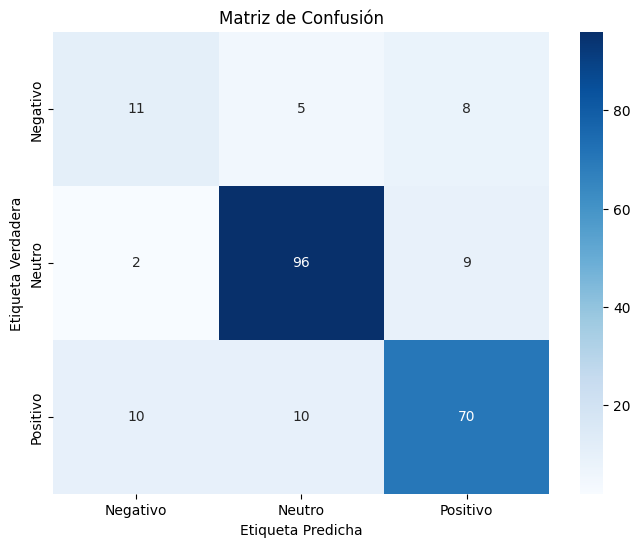

In [48]:
class_names = label_encoder.classes_

# Paso 1: Realizamos las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 2: Calculamos la Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy) del modelo: {accuracy:.4f}")

# Paso 3: Generamos el Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Paso 4: Generamos la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Paso 5: Visalizamos la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

##### ![Primeras conclusiones:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Primeras%20conclusiones.jpg?raw=true)

Obtuvimos una precisión inicial del 80.09%, todo indica que el modelo tiene un buen rendimiento general.<br>
Se detecta un rendimiento desigual por clase:
- Neutro y Positivo (Altos F1-scores ~0.80-0.88): El modelo maneja muy bien las clases mayoritarias.
- Negativo (F1-score ~0.47): El rendimiento para la clase minoritaria es bajo, esto se debe a la baja cantidad de muestras (24 en el conjunto de prueba).

##### ![Conclusiones finales:](https://raw.githubusercontent.com/chetincho/ds_Prediccion_de_enfermedades/refs/heads/main/img/apartado%20deep%20learning.jpg)

A continuación, se detallan una serie de actividades relacionadas con la implementación de una red neuronal del tipo RNN (Red Neuronal Recurrente) con capas LSTM, utilizando embeddings estáticos preentrenados en español.<br>
<br>
⚠️ Consideraciones:
- Se utilizará como conjunto de datos el archivo generado en el apartado anterior `(tweets_politicos_analizados.csv)`, que consta de 1105 registros. Si bien se trata de un conjunto pequeño de datos para este tipo de soluciones, se compensa parcialmente con el uso de embeddings preentrenados.
- Como ya se mencionó previamente, al no contar con un conjunto de datos etiquetado manualmente, se tomará como "verdad" el etiquetado resultante de nuestro análisis basado en léxicos.

🗒️ A continuación vamos a preparar el entorno para implementar Deep Learning

##### ![Librerías utilizadas:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Librerias%20utilizadas.jpg?raw=true)

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import gensim.models # Para cargar el modelo FastText .bin
import gensim.models.fasttext


🗒️ Descarga de los Embeddings Pre-entrenados de FastText para Español c/ programación defensiva

In [50]:
import os
import requests
import zipfile

# URL oficial del modelo FastText pre-entrenado para español (versión .bin)
fasttext_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.zip"
zip_file_name = "wiki.es.zip"
extracted_folder_name = "wiki.es"
model_file_name = "wiki.es.bin" # Este es el archivo que nos interesa dentro del zip

# Directorio donde se guardarán los embeddings
embeddings_dir = 'fasttext_embeddings'
os.makedirs(embeddings_dir, exist_ok=True) # Creamos el directorio si no existe

# Ruta completa para el archivo zip descargado
zip_file_path = os.path.join(embeddings_dir, zip_file_name)
# Ruta completa para el archivo bin extraído
model_file_path = os.path.join(embeddings_dir, model_file_name)

# Descargamos del archivo ZIP
if not os.path.exists(model_file_path): # Solo descarga si el archivo .bin no existe
    if not os.path.exists(zip_file_path):
        print(f"Descargando FastText embeddings para español desde: {fasttext_url}")
        try:
            with requests.get(fasttext_url, stream=True) as r:
                r.raise_for_status() # Lanza un error para códigos de estado HTTP incorrectos
                with open(zip_file_path, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192):
                        f.write(chunk)
            print("Descarga completada.")
        except requests.exceptions.RequestException as e:
            print(f"Error al descargar FastText embeddings: {e}")
            print("Por favor, inténtalo de nuevo o descarga manualmente desde https://fasttext.cc/docs/en/pretrained-vectors.html")
    else:
        print(f"El archivo ZIP '{zip_file_name}' ya existe.")

    # Descomprimimos el archivo ZIP
    if not os.path.exists(model_file_path):
        print(f"Descomprimiendo '{zip_file_name}'...")
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Extrae solo el archivo .bin que nos interesa
                zip_ref.extract(model_file_name, embeddings_dir)
            print("Descompresión completada. Archivo .bin listo.")
        except zipfile.BadZipFile:
            print(f"Error: El archivo '{zip_file_name}' está corrupto. Intenta borrarlo y descargarlo de nuevo.")
        except Exception as e:
            print(f"Error durante la descompresión: {e}")
else:
    print(f"El modelo FastText '{model_file_name}' ya está disponible en '{embeddings_dir}'.")

print(f"\nRuta del modelo FastText: {model_file_path}")

El modelo FastText 'wiki.es.bin' ya está disponible en 'fasttext_embeddings'.

Ruta del modelo FastText: fasttext_embeddings\wiki.es.bin


🗒️ Cargamos el dataset el cual ya posee datos etiquetados utilizando la estrategia de léxicos

In [51]:
# Origen de los datos
url_dataset="https://raw.githubusercontent.com/chetincho/Analisis_de_Sentimientos/refs/heads/main/tweets_politicos_analizados.csv"

# Carga del dataframe
df_sentimientos = pd.read_csv(url_dataset, sep='|')

# Seteamos el índice del dataframe para que comience en 1
df_sentimientos.set_index(pd.Index(range(1, len(df_sentimientos) + 1)), inplace=True)

# Seteamos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

🗒️ Nos aseguramos que el atributo "Texto_Limpio" no posea valores nulos

In [52]:
df_sentimientos['Texto_Limpio'] = df_sentimientos['Texto_Limpio'].fillna('')
print("ℹ️ Valores nulos por columna:")
print(df_sentimientos.isnull().sum())

ℹ️ Valores nulos por columna:
Usuario X             0
ID                    0
Text                  0
Language              0
Type                  0
Author Name           0
Author Username       0
View Count            0
Bookmark Count        0
Favorite Count        0
Retweet Count         0
Reply Count           0
Quote Count           0
Created At            0
Source                0
Hashtags           1104
URLs                840
Media Type         1025
Media URLs         1025
Texto_Limpio          0
Score_Tweet           0
Polaridad_Tweet       0
dtype: int64


🗒️ A continuación llevamos adelante las actividades de preparación de datos para la RNN.

In [53]:
# Codificacion de la variable objetivo (y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sentimientos['Polaridad_Tweet'])

class_names = label_encoder.classes_

In [54]:
# Creamos los conjuntos de entrenamiento y prueba
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_sentimientos['Texto_Limpio'], y, test_size=0.2, random_state=42, stratify=y
)

🗒️ Tokenización: Convertiremos cada tweet en una secuencia de números.

⚠️ Parámetros importantes:<br>
- `diccionario_de_palabras`: Solo serán consideradas las 20.000 palabras más frecuentes.
- `longitud_maxima`: Definimos una función para obtener la longitud máxima (+5 unidades) de la secuencia más larga de texto del subconjunto de entrenamiento

In [55]:
diccionario_de_palabras = 20000      
longitud_maxima = X_train_text.apply(lambda x: len(x.split())).max() + 5

- `num_words`: Parametrizamos a Tokenizer con diccionario_de_palabras limitando el análisis a las 20.000 palabras mas frecuentes. El resto de las palabras serán tratadas como "palabras fuera del vocabulario".
- `oov_token`: Las palabras fuera del vocabulario, es decir, que no estén dentro de las 20.000 palabras mas utilizadas serán reemplazadas por el token "unk".

In [56]:
tokenizer = Tokenizer(num_words=diccionario_de_palabras, oov_token="<unk>")

# Le damos a Tokenizer los tweets del subconjunto de entrenamiento para que aprenda el vocabulario
tokenizer.fit_on_texts(X_train_text)

# Luego de aprender el vocabulario convertimos cada texto en una secuencia de números enteros
X_train_sequences = tokenizer.texts_to_sequences(X_train_text)
X_test_sequences = tokenizer.texts_to_sequences(X_test_text)

🗒️ Padding: Aseguramos la longitud de todas las secuencias a longitud_maxima, sea que las completemos con 0 si son muy cortas o las trunquemos en caso de ser muy largas. 

In [57]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=longitud_maxima, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=longitud_maxima, padding='post', truncating='post')

🗒️ Embeddings Pre-entrenados: Debido a la naturaleza del dataset y la escasa cantidad de registros (tweets) se decide optar por embeddings pre-entrenados con el objetivo de hacer uso de las relaciones semánticas y sintácticas que ya han sido "vistas".

In [58]:
embeddings_dir = 'C:/Users/marti/Documents/Capacitaciones/Data Science III/Proyecto Final/Analisis_de_Sentimientos/fasttext_embeddings'
model_file_name = "wiki.es.bin"
model_file_path = os.path.join(embeddings_dir, model_file_name)

if not os.path.exists(model_file_path):
    print(f"Error: El archivo de modelo FastText '{model_file_path}' no se encontró.")
else:
    print(f"\nCargando modelo FastText desde: {model_file_path}")
    try:
        fasttext_model = gensim.models.fasttext.load_facebook_model(model_file_path)
        # Verifica el tamaño del vocabulario
        print(f"Vocabulario cargado: {len(fasttext_model.wv.index_to_key)} palabras")

    except Exception as e:
        print(f"Error al cargar el modelo FastText: {e}")

    # Dimensiones de los embeddings de FastText (ej. 300 para wiki.es.bin)
    embedding_dim = fasttext_model.vector_size
    print(f"Dimensión de los embeddings de FastText: {embedding_dim}")

    word_index = tokenizer.word_index # Obtiene el vocabulario aprendido por el tokenizer
    num_words_in_vocab = min(diccionario_de_palabras, len(word_index) + 1) # Asegurar no exceder diccionario_de_palabras o el vocabulario real

    embedding_matrix = np.zeros((num_words_in_vocab, embedding_dim))
    for word, i in word_index.items():
        if i < num_words_in_vocab: # Solo para palabras dentro de nuestro vocabulario limitado
            if word in fasttext_model.wv: # Si la palabra está en el modelo FastText
                embedding_matrix[i] = fasttext_model.wv[word]
            else:
                pass # Ya está en ceros

    print(f"\nMatriz de embeddings creada con forma: {embedding_matrix.shape}")


Cargando modelo FastText desde: C:/Users/marti/Documents/Capacitaciones/Data Science III/Proyecto Final/Analisis_de_Sentimientos/fasttext_embeddings\wiki.es.bin
Vocabulario cargado: 985667 palabras
Dimensión de los embeddings de FastText: 300

Matriz de embeddings creada con forma: (2566, 300)


🗒️ Construimos la Arquitectura del Modelo LSTM

In [59]:
num_classes = len(class_names)
model = Sequential()
model.add(Embedding(input_dim=num_words_in_vocab,
                    output_dim=embedding_dim,
                    input_length=longitud_maxima,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 211, 300)          769800    
                                                                 
 lstm (LSTM)                 (None, 211, 128)          219648    
                                                                 
 dropout (Dropout)           (None, 211, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1039051 (3.96 MB)
Trainable params: 2692

🗒️ Entrenamos del Modelo


Comenzando el entrenamiento del modelo LSTM con 20 épocas y batch_size=32...
Epoch 1/20


28/28 [==============================] - ETA: 0s - loss: 1.0082 - accuracy: 0.4378
Epoch 1: val_accuracy improved from -inf to 0.48416, saving model to best_lstm_model.keras
28/28 [==============================] - 5s 118ms/step - loss: 1.0082 - accuracy: 0.4378 - val_loss: 0.9645 - val_accuracy: 0.4842
Epoch 2/20
28/28 [==============================] - ETA: 0s - loss: 0.9747 - accuracy: 0.4570
Epoch 2: val_accuracy did not improve from 0.48416
28/28 [==============================] - 3s 98ms/step - loss: 0.9747 - accuracy: 0.4570 - val_loss: 0.9598 - val_accuracy: 0.4842
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 0.9594 - accuracy: 0.4740
Epoch 3: val_accuracy did not improve from 0.48416
28/28 [==============================] - 3s 95ms/step - loss: 0.9594 - accuracy: 0.4740 - val_loss: 0.9626 - val_accuracy: 0.4842
Epoch 4/20
28/28 [==============================] - ET

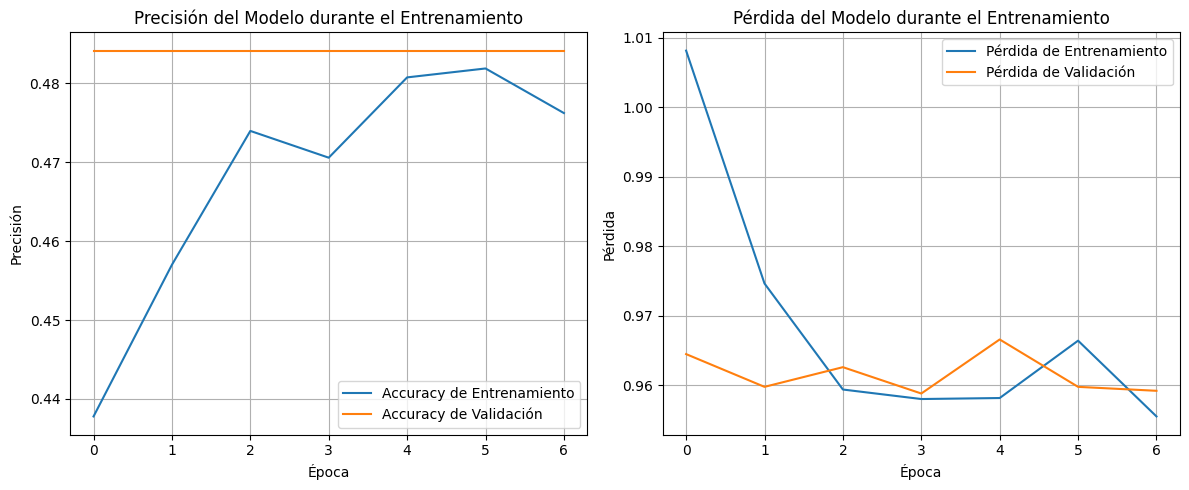

In [60]:
# Parámetros de Entrenamiento
epochs = 20
batch_size = 32

# Callbacks para un mejor entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath='best_lstm_model.keras',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# Entrenamiento del Modelo
print(f"\nComenzando el entrenamiento del modelo LSTM con {epochs} épocas y batch_size={batch_size}...")

history = model.fit(
    X_train_padded,         # Datos de entrenamiento (secuencias padded)
    y_train,                # Etiquetas de entrenamiento (numéricas)
    epochs=epochs,          # Número de épocas
    batch_size=batch_size,  # Tamaño del batch
    validation_data=(X_test_padded, y_test), # Datos para validar el modelo en cada época
    callbacks=[early_stopping, model_checkpoint] # Usamos los callbacks definidos
)

print("\nEntrenamiento del modelo LSTM completado.")

# Graficamos el historial de entrenamiento para ver la evolución de la pérdida y la precisión
plt.figure(figsize=(12, 5))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de Validación')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

😵 La gráfica evidencia que la precisión del modelo en datos no vistos (Validación, línea naranja) se mantiene consistentemente baja, alrededor del 48.5%.

🗒️ Evaluamos el Modelo:

7/7 [==============================] - 1s 35ms/step

Precisión (Accuracy) del modelo LSTM: 0.4842

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00        24
      Neutro       0.48      1.00      0.65       107
    Positivo       0.00      0.00      0.00        90

    accuracy                           0.48       221
   macro avg       0.16      0.33      0.22       221
weighted avg       0.23      0.48      0.32       221


Matriz de Confusión:
[[  0  24   0]
 [  0 107   0]
 [  0  90   0]]


c:\Users\marti\Documents\Capacitaciones\Data Science III\Proyecto Final\Analisis_de_Sentimientos\.venv_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marti\Documents\Capacitaciones\Data Science III\Proyecto Final\Analisis_de_Sentimientos\.venv_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marti\Documents\Capacitaciones\Data Science III\Proyecto Final\Analisis_de_Sentimientos\.venv_tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: P

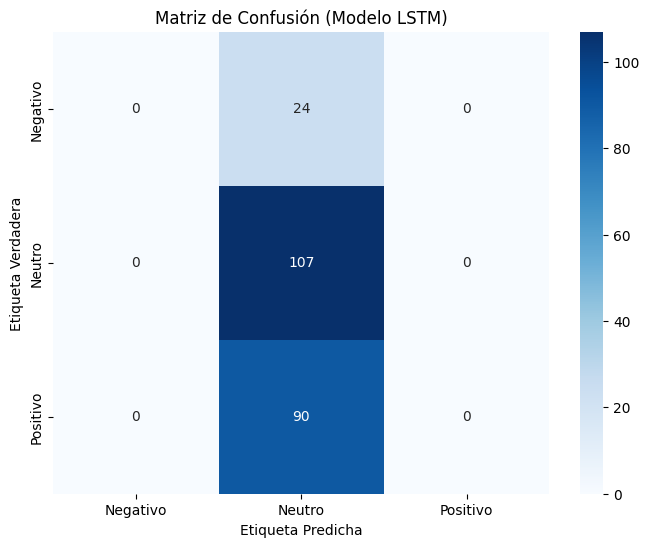

In [61]:
# Cargamos el mejor modelo guardado
model_path = 'best_lstm_model.keras'
loaded_model = load_model(model_path)

# Paso 1: Realizamos las predicciones sobre el conjunto de prueba
y_pred_probs = loaded_model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

# Paso 2: Calculamos la Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy) del modelo LSTM: {accuracy:.4f}")

# Paso 3: Generamos el Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Paso 4: Generamos la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Paso 5: Visualizamos la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión (Modelo LSTM)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Conclusión final:
Como se observa la precisión del modelo LSTM es del 48.42%, son resultados muy pobres si consideramos que es un problema de clasificación de 3 clases.
Para las clases 'Negativo' y 'Positivo', la precisión, recall y f1-score son 0.00. Esto significa que el modelo nunca predijo correctamente ninguna muestra de estas clases.
La matriz de confusión [[0 24 0], [0 107 0], [0 90 0]] revela que el modelo predijo casi todas las muestras como 'Neutro'.
- Los 24 tweets realmente Negativos fueron predichos como Neutros.
- Los 107 tweets realmente Neutros fueron correctamente predichos como Neutros.
- Los 90 tweets realmente Positivos fueron predichos como Neutros.
<br>
<br>
Estos resultados del LSTM son una señal clara de que el modelo no está aprendiendo.
<br>